Self-Organizing Maps

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from minisom import MiniSom
import math

# Sklearn auxiliary items
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Pandas options
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from utils import(
    build_lattice,
    plot_neurons_distances,
    visualize_data_points_grid,
    classify,
    plot_feature_influence,
    plot_most_important_variable,
    train_plot_som
)

customer_info = pd.read_csv('customer_info.csv')
customer_basket = pd.read_csv('customer_basket.csv')

In [3]:
scaled_data = StandardScaler().fit_transform(customer_info)
scaled_data = np.nan_to_num(scaled_data, nan=0)

ValueError: could not convert string to float: 'April Clark'

In [ ]:
# Training a Self-Organized Map with a 10 by 10 grid, using 6 features.
som = MiniSom(
    10,
    10,
    6,
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

A good way to assess where we can stop the number iterations is to find the `quantization error` throughout the iterations.

In [ ]:
# Set the seed of Numpy just to be sure of replicability
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data, i)
    q_errors.append(som.quantization_error(scaled_data))

In [ ]:
# Setting up the same som again and retraining it
som = MiniSom(
    15,
    15,
    6, 
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42)
som.train(scaled_data, 1000)

In [ ]:
sectors = list(financial_valuation_data.Sector.unique())
print(sectors)

In [4]:
customer_info

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,0,29930,April Clark,female,01/15/1972 02:27 PM,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,726.0,962.0,1213.0,1598.0,1894.0,457.0,412.0,428.0,386.0,0.158741,2018.0,NaN,38.721807,-9.125534
1,1,6813,Bsc. Paul Ketchum,male,07/31/1944 10:53 AM,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,792.0,102.0,104.0,741.0,346.0,394.0,75.0,226.0,73.0,1.227890,2013.0,971840.0,38.734668,-9.163533
2,2,39451,Mary Downing,female,11/13/1989 02:11 PM,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,1585.0,980.0,1872.0,1323.0,1971.0,920.0,335.0,192.0,319.0,0.101598,2011.0,NaN,38.787126,-9.147077
3,3,21557,Manuel Kueny,male,08/09/1976 06:23 AM,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,28.0,269.0,1855.0,939.0,785.0,139.0,679.0,270.0,221.0,0.259943,2009.0,NaN,38.741816,-9.159700
4,4,16415,Phd. Curtis Tharp,male,07/11/1966 08:12 AM,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,258.0,726.0,547.0,983.0,1492.0,1046.0,112.0,144.0,244.0,0.317822,2012.0,925367.0,38.785921,-9.149221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,34055,37071,Mary Diaz,female,01/20/1999 06:47 PM,1.0,1.0,0.0,2.0,62321.0,5250.0,16.0,813.0,528.0,1524.0,687.0,1687.0,1048.0,379.0,258.0,163.0,0.162331,2018.0,NaN,38.750813,-9.103808
34056,34056,27422,John Gross,male,08/01/1984 07:50 PM,1.0,1.0,0.0,3.0,16084.0,3796.0,13.0,502.0,748.0,694.0,1200.0,568.0,949.0,263.0,319.0,379.0,0.614179,2019.0,985393.0,38.745020,-9.169168
34057,34057,39540,Kathleen Harper,female,09/16/2000 07:22 AM,1.0,0.0,1.0,2.0,14631.0,8784.0,17.0,402.0,262.0,484.0,509.0,1472.0,368.0,804.0,110.0,228.0,0.535617,2018.0,NaN,38.767834,-9.172368
34058,34058,18367,Msc. Jenny Landry,female,04/09/1961 10:52 AM,1.0,1.0,1.0,4.0,37420.0,4702.0,9.0,195.0,485.0,NaN,1231.0,904.0,1088.0,401.0,376.0,151.0,0.435014,2015.0,953651.0,38.732462,-9.156155


We have 11 shopping areas:
*  'Groceries'
*  'Electronics'
*  'Vegetables'
*  'Non-Alcoholic Drinks'
*  'Alcoholinc Drinks'
*  'Meat'
*  'Fish'
*  'Hygiene'
*  'Videogames'
*  'Pet Food'
*  'Distinct Products'

In [13]:
areas = ['Groceries',  'Electronics',  'Vegetables',  'Non-Alcoholic Drinks',  'Alcoholinc Drinks',  'Meat',  'Fish',  'Hygiene',  'Videogames', 'Pet Food', 'Distinct Products']

In [5]:
# Our first company is:
customer_info.iloc[0]

Unnamed: 0                                                   0
customer_id                                              29930
customer_name                                      April Clark
customer_gender                                         female
customer_birthdate                         01/15/1972 02:27 PM
kids_home                                                  2.0
teens_home                                                 2.0
number_complaints                                          1.0
distinct_stores_visited                                    4.0
lifetime_spend_groceries                                7789.0
lifetime_spend_electronics                              5601.0
typical_hour                                              13.0
lifetime_spend_vegetables                                726.0
lifetime_spend_nonalcohol_drinks                         962.0
lifetime_spend_alcohol_drinks                           1213.0
lifetime_spend_meat                                    

In [ ]:
customer_info['winner_node'] = (
    [som.winner(scaled_data[i]) for i in range(0, len(scaled_data))]
)

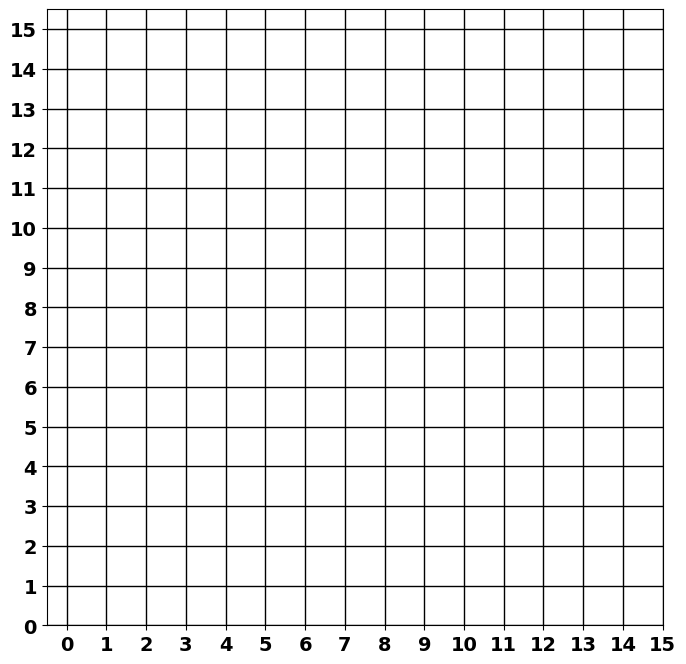

In [11]:
build_lattice(15, 15)

In [ ]:
top_industries = (
    financial_valuation_data.groupby(['winner_node', 'Sector'], as_index=False)
    .size()
    .sort_values(by='size')
    .groupby(['winner_node'])
    .tail(1)
)

In [14]:
industry_color = {area: 'C'+str(i+1) for i, area in enumerate(area)}

NameError: name 'area' is not defined

NameError: name 'area' is not defined

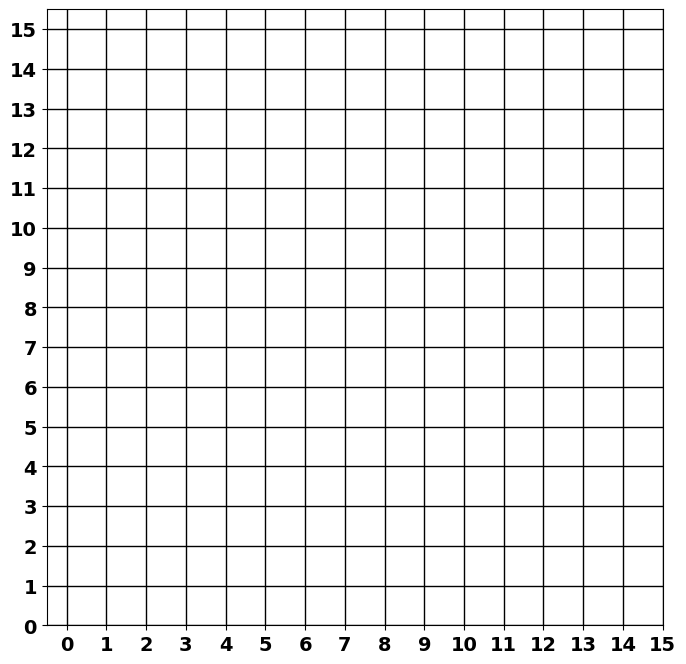

In [15]:
build_lattice(15, 15)

for index, row in top_industries.iterrows():
    # Print the row data
    plt.plot(row.winner_node[0]+0.5, row.winner_node[1]+0.5,
             'o', markerfacecolor='None',
            markeredgecolor=industry_color[row.Sector],
            markersize=12, markeredgewidth=2)
    plt.xlim(0, 15)
    plt.ylim(0, 15)

# Show the plot
plt.show()

In [ ]:
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()